In [2]:
import os
import pandas as pd

In [287]:
### Concating all the csv into one file
df = pd.DataFrame()
colnames = ["City",
            "Elevation (Feet)",
            "Condo value ($USD)",
            "State's Median Age (Years)",
            "Land area (Square Miles)",
            "City's Median Age (Years)",
            "Cost of living (avg:100)",
            "Median Income ($USD)",
            "Population (People)",
            "Population density (People/sq miles)",
            "States"]
dfs = []
for file in os.listdir("data/"):
    cur = pd.read_csv("data/" + file, index_col=0)
    cur["States"] = file.replace(".csv",'')
    dfs.append(cur)

df = pd.concat(dfs)
df.columns = colnames
#df.to_csv("states.csv")
df

,City,Elevation (Feet),Condo value ($USD),State's Median Age (Years),Land area (Square Miles),City's Median Age (Years),Cost of living (avg:100),Median Income ($USD),Population (People),Population density (People/sq miles),States
0,"Anchorage, AK",101 feet,"$320,800",33.5 years,1697.20,33.0 years,102.6,"$85,634","298,192",176,AK
1,"Badger, AK",NaN,"$226,900\r\n",33.5 years,NaN,31.9 years,104.2,"$77,328","19,482.",NaN,AK
2,"Bethel, AK",NaN,"$265,717",33.5 years,43.80,29.1 years,91.9,"$79,712","6,415 (74% urban, 26% rural).",147,AK
3,College,NaN,"$234,902",33.5 years,18.70,29.3 years,103.0,"$90,907","12,964.",694,AK
4,"Fairbanks, AK",440 feet,"$202,792",33.5 years,31.90,27.6 years,104.3,"$58,973","32,469 (100% urban, 0% rural).","1,019",AK
5,"Juneau, AK",5 feet,"$343,213",33.5 years,2716.70,37.4 years,90.2,"$89,780","32,406 (79% urban, 21% rural).",12,AK
6,Kalifornsky,NaN,"$244,884",33.5 years,69.20,32.7 years,106.6,"$79,841","7,850.",113,AK
7,Kenai,NaN,"$218,115",33.5 years,29.90,36.9 years,86.1,"$60,307","7,568 (64% urban, 36% rural).",253,AK
8,Ketchikan,NaN,"$242,176",33.5 years,3.37,38.0 years,89.6,"$55,383","8,245 (98% urban, 2% rural).","2,444",AK
9,Knik-Fairview,NaN,"$244,925",33.5 years,69.80,32.9 years,107.0,"$80,051","14,923.",214,AK


In [58]:
cols = df.columns
for col in cols: print(col)

City
Elevation (Feet)
Condo value ($USD)
Females (Years)
Land area (Square Miles)
Males (Years)
Cost of living ($USD)
Median Income ($USD)
Population (People)
Population density (People/sq miles)


In [256]:
##########################
#### Visualizing data ####
##########################
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6889 entries, 0 to 95
Data columns (total 11 columns):
City                                    6889 non-null object
Elevation (Feet)                        5188 non-null object
Condo value ($USD)                      6889 non-null object
Females (Years)                         6889 non-null object
Land area (Square Miles)                6650 non-null float64
Males (Years)                           6889 non-null object
Cost of living (avg:100)                6889 non-null float64
Median Income ($USD)                    6889 non-null object
Population (People)                     6889 non-null object
Population density (People/sq miles)    6650 non-null object
States                                  6889 non-null object
dtypes: float64(2), object(9)
memory usage: 645.8+ KB


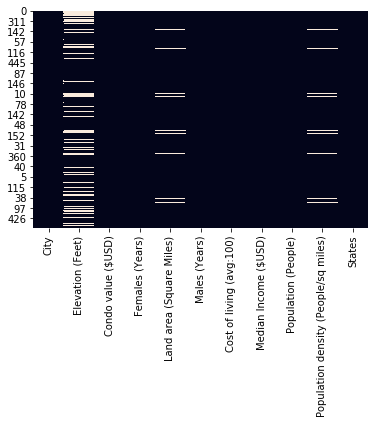

In [257]:
sns.heatmap(df.isnull(), cbar=False)

In [288]:
df['City']=df['City'].astype(str)
df['States']=df['States'].astype(str)

In [291]:
df['Elevation (Feet)']=df['Elevation (Feet)'].str.extract('(\d+)')
df['Elevation (Feet)']=df['Elevation (Feet)'].astype(float)
#Replace NA with median
df['Elevation (Feet)'].fillna(df['Elevation (Feet)'].median(), inplace=True)

In [294]:
df['Condo value ($USD)']=df['Condo value ($USD)'].str.replace(',', '').str.extract('(\d+)')

In [295]:
df['Condo value ($USD)']=df['Condo value ($USD)'].astype(float)

In [297]:
df["State's Median Age (Years)"]=df["State's Median Age (Years)"].str.replace('years','')

In [298]:
df["State's Median Age (Years)"]=df["State's Median Age (Years)"].astype(float)

In [300]:
#Replace NA with median
df['Land area (Square Miles)']=df['Land area (Square Miles)'].astype(float)
df['Land area (Square Miles)'].fillna(df['Land area (Square Miles)'].median(), inplace=True)

In [301]:
df["City's Median Age (Years)"]=df["City's Median Age (Years)"].str.replace('years','')

In [302]:
df["City's Median Age (Years)"]=df["City's Median Age (Years)"].astype(float)

In [303]:
df['Cost of living (avg:100)']=df['Cost of living (avg:100)'].astype(float)

In [304]:
df['Median Income ($USD)']=df['Median Income ($USD)'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [305]:
df['Population (People)']=df['Population (People)'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [306]:
df["Population density (People/sq miles)"]=df["Population density (People/sq miles)"].str.replace(',', '').str.extract('(\d+)').astype(float)
#Replace NA with median
df["Population density (People/sq miles)"].fillna(df["Population density (People/sq miles)"].median(),inplace=True)

In [307]:
df.dtypes

City                                     object
Elevation (Feet)                        float64
Condo value ($USD)                      float64
State's Median Age (Years)              float64
Land area (Square Miles)                float64
City's Median Age (Years)               float64
Cost of living (avg:100)                float64
Median Income ($USD)                    float64
Population (People)                     float64
Population density (People/sq miles)    float64
States                                   object
dtype: object

In [277]:
df

,City,Elevation (Feet),Condo value ($USD),State's Median Age (Years),Land area (Square Miles),City's Median Age (Years),Cost of living (avg:100),Median Income ($USD),Population (People),Population density (People/sq miles),States
0,"Anchorage, AK",101.0,320800.0,33.5,1697.200000,33.0,102.6,85634.0,298192.0,176.0,AK
1,"Badger, AK",500.0,226900.0,33.5,43.100647,31.9,104.2,77328.0,19482.0,2057.0,AK
2,"Bethel, AK",500.0,265717.0,33.5,43.800000,29.1,91.9,79712.0,6415.0,147.0,AK
3,College,500.0,234902.0,33.5,18.700000,29.3,103.0,90907.0,12964.0,694.0,AK
4,"Fairbanks, AK",440.0,202792.0,33.5,31.900000,27.6,104.3,58973.0,32469.0,1019.0,AK
5,"Juneau, AK",5.0,343213.0,33.5,2716.700000,37.4,90.2,89780.0,32406.0,12.0,AK
6,Kalifornsky,500.0,244884.0,33.5,69.200000,32.7,106.6,79841.0,7850.0,113.0,AK
7,Kenai,500.0,218115.0,33.5,29.900000,36.9,86.1,60307.0,7568.0,253.0,AK
8,Ketchikan,500.0,242176.0,33.5,3.370000,38.0,89.6,55383.0,8245.0,2444.0,AK
9,Knik-Fairview,500.0,244925.0,33.5,69.800000,32.9,107.0,80051.0,14923.0,214.0,AK


In [202]:
dfx = df.reset_index(drop=True )

In [203]:
dfx.loc[:, "Population density (People/sq miles)"][57]

'1074'

In [204]:
df['Females (Years)'].value_counts()

36.4    657
37.9    462
38.4    422
42.1    404
34.5    349
39.5    330
36.5    303
38.7    300
39.2    266
39.3    259
40.6    215
37.7    214
38.5    173
38.2    166
39.7    155
36.7    147
38.0    146
40.7    128
39.4    127
37.6    111
39.0     99
38.6     96
33.3     95
35.9     89
37.5     88
30.7     84
39.1     82
37.2     77
33.4     62
32.3     59
       ... 
35.8     26
44.5     25
36.2     23
43.9     23
35.0     23
42.7     21
40.1     21
34.3     20
33.5     18
34.2     17
36.8     16
40.2     16
43.0     14
42.6     14
34.6     13
43.1     12
27.1     11
33.2      5
45.8      5
35.7      4
32.1      2
34.4      2
34.7      2
32.2      2
37.4      2
35.1      1
35.2      1
33.8      1
34.0      1
33.9      1
Name: Females (Years), Length: 69, dtype: int64

In [205]:
df.dtypes

City                                     object
Elevation (Feet)                         object
Condo value ($USD)                       object
Females (Years)                         float64
Land area (Square Miles)                float64
Males (Years)                           float64
Cost of living (avg:100)                float64
Median Income ($USD)                     object
Population (People)                      object
Population density (People/sq miles)     object
dtype: object